<a href="https://colab.research.google.com/github/BrunoASNascimento/image-processing-study/blob/master/cell_biology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#GIT CLONE
To get data

1. Qual é a quantidade de bits testa imagem? Justifique a sua resposta.
2. Converta esta imagem para níveis de cinza (usar a(s) banda(s) mais significativa(s)). 
Para as questões seguintes, trabalhe com esta imagem em níveis de cinza.
3. Calcule e interprete o histograma desta imagem.
4. Desenvolva um script em Matlab (ou outra linguagem qualquer) para contar o número de células desta imagem.  Justifique cada comando do script. 


In [4]:
!rm -rf /content/image-processing-study
!git clone https://github.com/BrunoASNascimento/image-processing-study

Cloning into 'image-processing-study'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 9 (delta 1), reused 5 (delta 1), pack-reused 0
Unpacking objects: 100% (9/9), done.


#Imports

In [1]:
from PIL import Image, ImageFilter
from google.colab.patches import cv2_imshow
import cv2
from matplotlib import pyplot as plt

#Read image

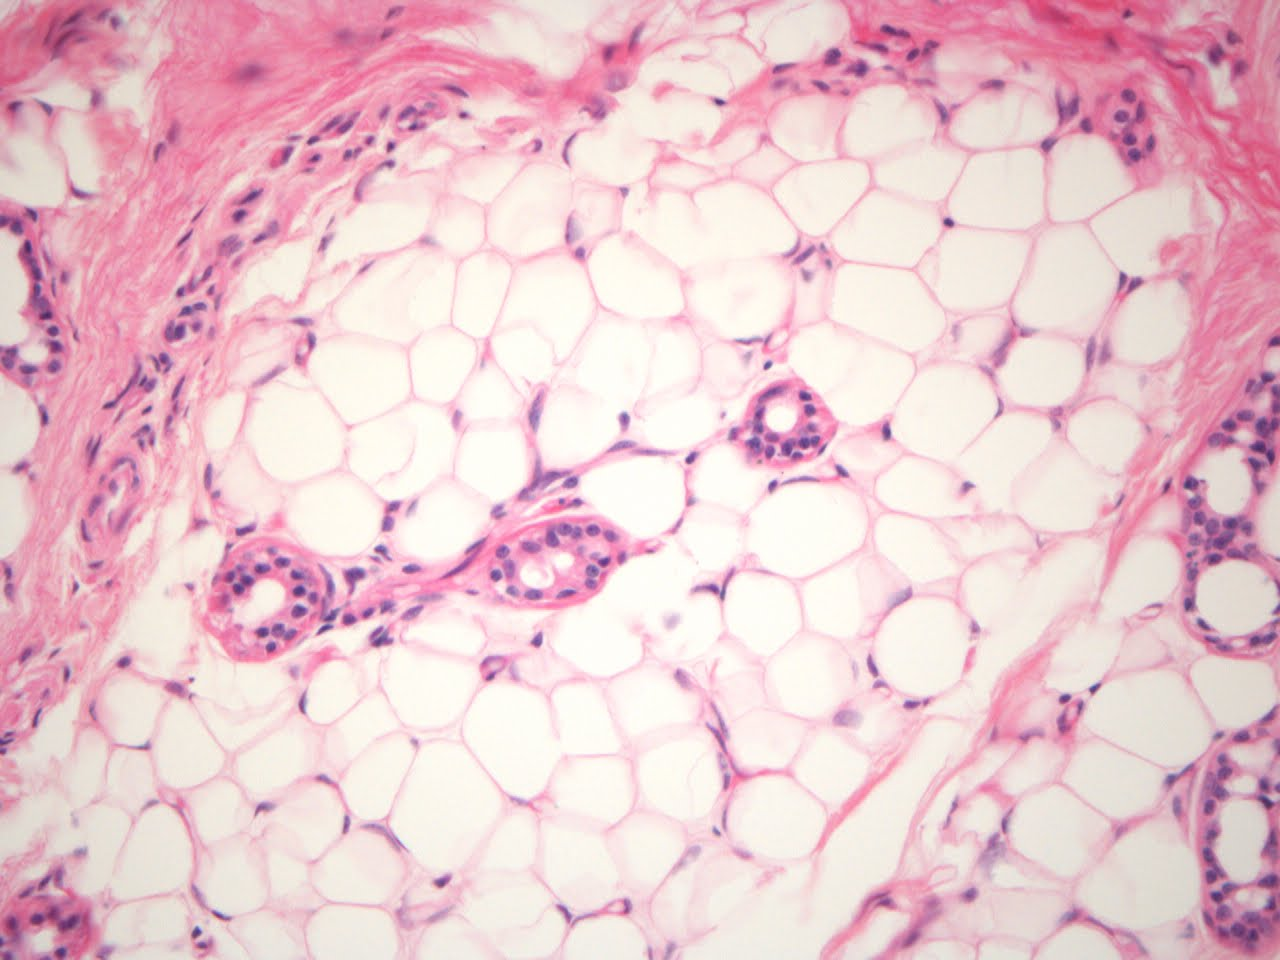

In [18]:
img = cv2.imread('/content/image-processing-study/data/adiposo01.jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

#Convert image to grayscale

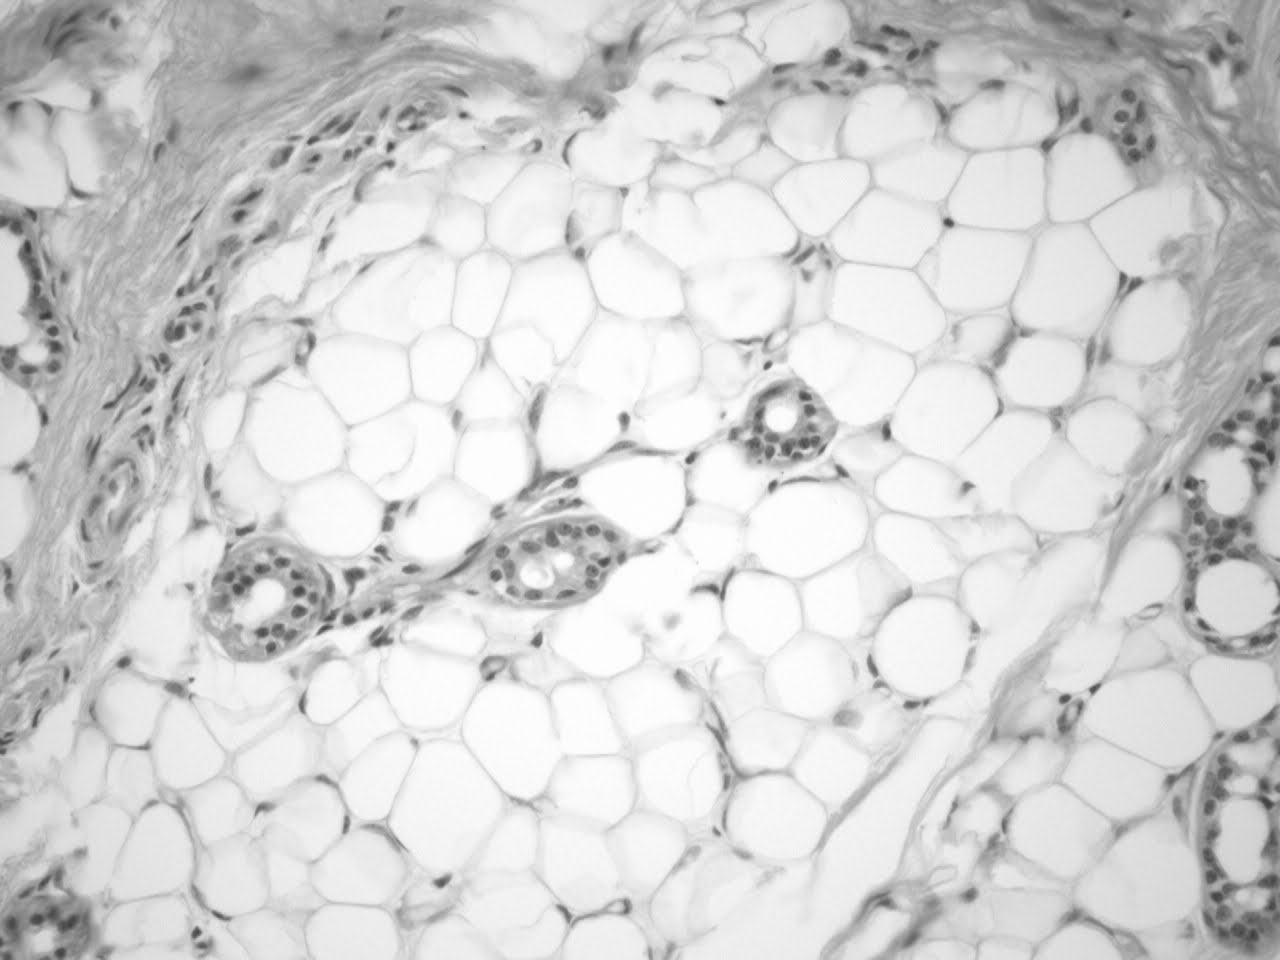

In [19]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(img_gray)

#Convert the contrast and brightness scale

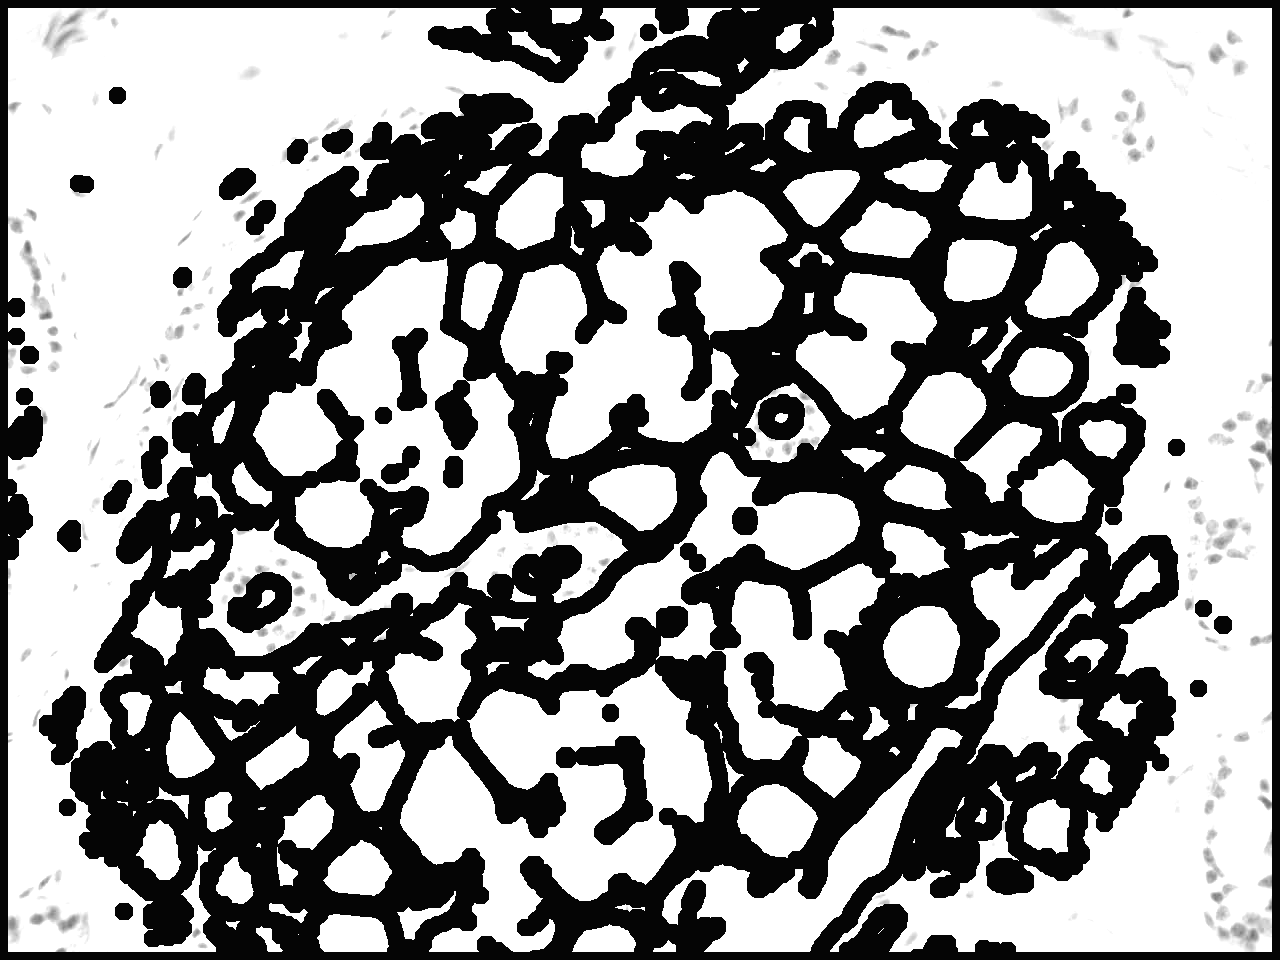

In [121]:
new_image = cv2.convertScaleAbs(img_gray, alpha=-2, beta=5)
cv2_imshow(new_image)

#Calculates histogram

In [122]:
hist = cv2.calcHist([img_gray],[0],None,[256],[0,256])

#Histogram chart

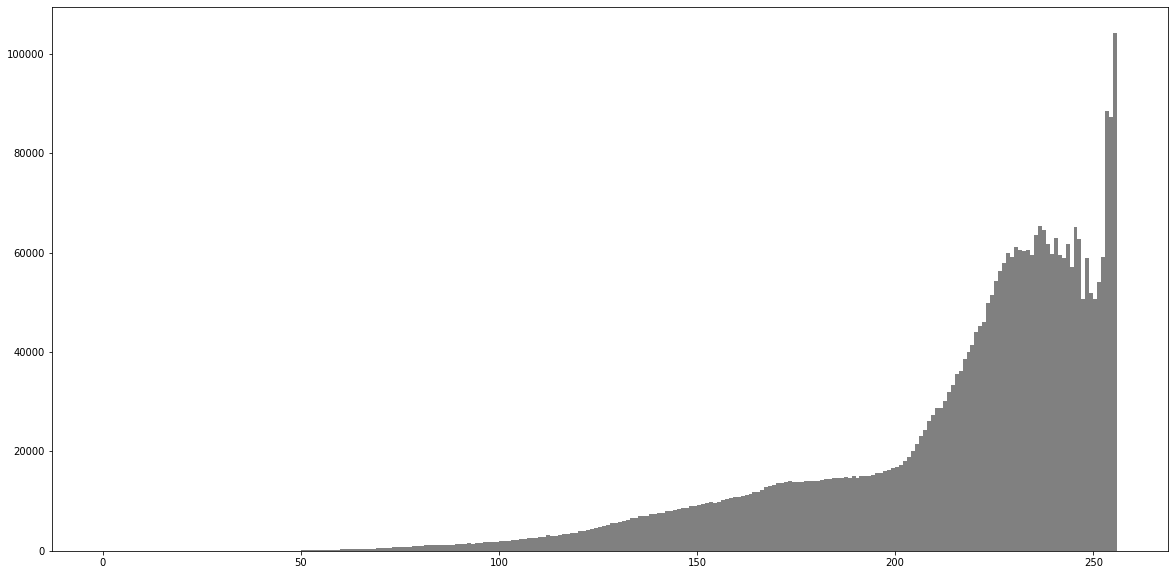

In [123]:
plt.figure(figsize=(20,10))
plt.hist(img.ravel(),256,[0,256],color='grey')
plt.show()

#Create a binary thresholded image

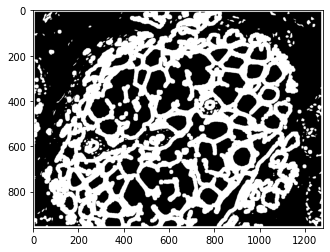

In [124]:
_, binary = cv2.threshold(new_image, 225, 255, cv2.THRESH_BINARY_INV)
plt.imshow(binary, cmap="gray")
plt.show()

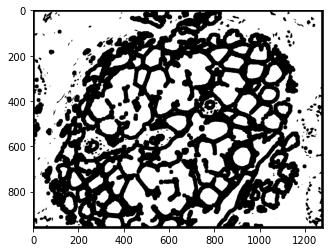

In [125]:
plt.imshow(np.invert(binary), cmap="gray")
plt.show()

# Get the image curve

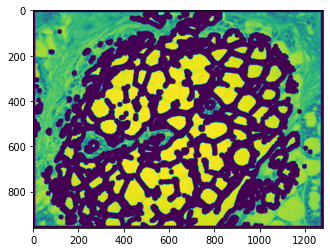

In [126]:
contours, hierarchy = cv2.findContours(img_gray, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
image = cv2.drawContours(img_gray, contours, -1, (0, 255, 0), 2)
plt.imshow(image)
plt.show()

In [127]:
print("Number of Contours found = " + str(len(contours))) 

Number of Contours found = 204
